In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = 'C:/Users/pradeepo/Downloads/Driven Data/train_values.csv'

In [4]:
df=pd.read_csv(data)

In [5]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.size

10163439

In [7]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [10]:
data1 = 'C:/Users/pradeepo/Downloads/Driven Data/train_labels.csv'

In [11]:
df1=pd.read_csv(data1)

In [12]:
df2 = df.merge(df1,on='building_id',how='left')

In [13]:
df2.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [14]:
df2.damage_grade.isnull().sum()

0

In [15]:
g1 = df2.groupby('damage_grade')['age'].mean()

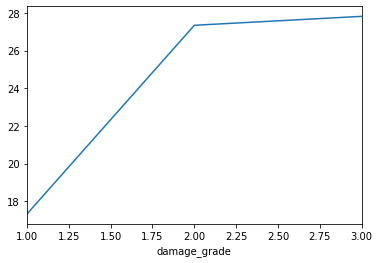

In [16]:
g1.plot()

In [17]:
df2['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [18]:
df2.groupby('damage_grade')['foundation_type'].count()

damage_grade
1     25124
2    148259
3     87218
Name: foundation_type, dtype: int64

In [19]:
df2['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

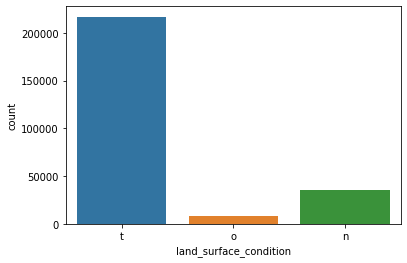

In [20]:
sns.countplot(x='land_surface_condition', data=df2)

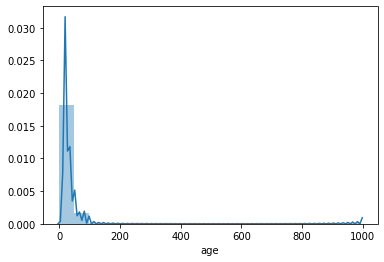

In [21]:
sns.distplot(df2['age'], bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0xbe7c780>,
 'caps': [<matplotlib.lines.Line2D at 0xbe7ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0xbe7c390>],
 'medians': [<matplotlib.lines.Line2D at 0xbe85550>],
 'fliers': [<matplotlib.lines.Line2D at 0xbe85898>],
 'means': []}

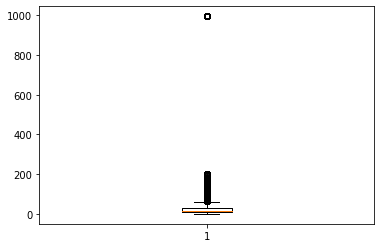

In [22]:
plt.boxplot(df2['age'])

In [23]:
df2 = df2[df2['age']<=200]

{'whiskers': [<matplotlib.lines.Line2D at 0xc13d668>,
 'caps': [<matplotlib.lines.Line2D at 0xc13dcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc13d240>],
 'medians': [<matplotlib.lines.Line2D at 0xc14a3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc14a710>],
 'means': []}

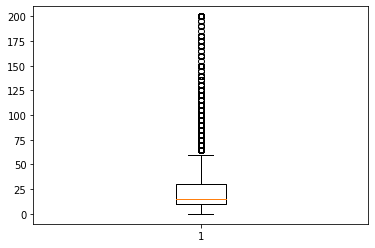

In [24]:
plt.boxplot(df2['age'])

In [25]:
df2 = df2[df2['age']<=75]

{'whiskers': [<matplotlib.lines.Line2D at 0xc1a14e0>,
 'caps': [<matplotlib.lines.Line2D at 0xc1a1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc1a10b8>],
 'medians': [<matplotlib.lines.Line2D at 0xc1a1eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc1ab5f8>],
 'means': []}

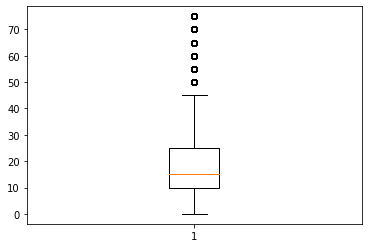

In [26]:
plt.boxplot(df2['age'])

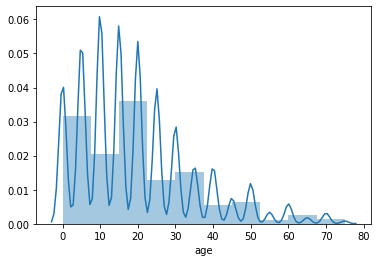

In [27]:
sns.distplot(df2['age'], bins=10)

In [28]:
df2.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [29]:
df3=pd.get_dummies(df2, columns=['land_surface_condition','foundation_type','roof_type','other_floor_type','ground_floor_type','position','plan_configuration','legal_ownership_status'], prefix=['land_surface_condition','foundation_type','roof_type','ground_floor_type','position','plan_configuration','other_floor_type','legal_ownership_status'], drop_first=True)

In [30]:
df3.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,other_floor_type_f,other_floor_type_m,other_floor_type_n,other_floor_type_o,other_floor_type_q,other_floor_type_s,other_floor_type_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


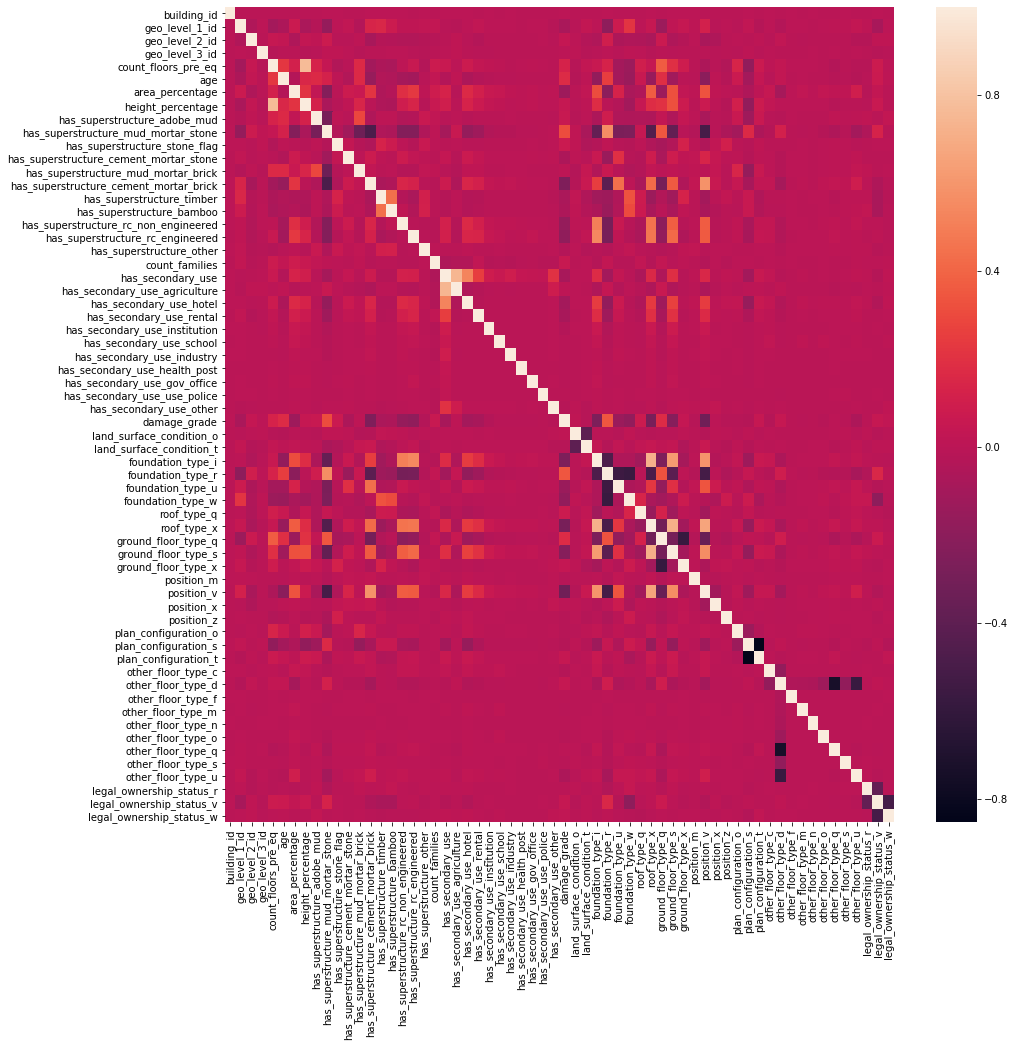

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.astype(float).corr())

In [31]:
correlation = pd.DataFrame.corr(df3).iloc[31]

In [32]:
print(correlation.sort_values())

position_v                               -0.320951
roof_type_x                              -0.282631
foundation_type_i                        -0.266140
has_superstructure_cement_mortar_brick   -0.257960
ground_floor_type_s                      -0.228684
has_superstructure_rc_engineered         -0.180522
foundation_type_w                        -0.174425
has_superstructure_rc_non_engineered     -0.160187
foundation_type_u                        -0.140060
area_percentage                          -0.127937
has_secondary_use_hotel                  -0.098396
has_secondary_use_rental                 -0.084961
has_secondary_use                        -0.079913
geo_level_1_id                           -0.076256
has_superstructure_timber                -0.069630
other_floor_type_u                       -0.064210
has_superstructure_bamboo                -0.063335
has_superstructure_cement_mortar_stone   -0.060500
has_superstructure_other                 -0.030734
has_secondary_use_institution  

In [33]:
df_new = df3[['position_v','roof_type_x','foundation_type_i','has_superstructure_cement_mortar_brick','ground_floor_type_s','has_superstructure_rc_engineered','foundation_type_w','foundation_type_u','has_superstructure_rc_non_engineered','area_percentage','count_floors_pre_eq','age','ground_floor_type_q','has_superstructure_mud_mortar_stone','foundation_type_r','damage_grade']]

In [34]:
df3.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade', 'land_sur

In [128]:
dfimp=df3[['geo_level_1_id','geo_level_3_id','geo_level_2_id','age','area_percentage','height_percentage','count_families','count_floors_pre_eq','foundation_type_r','damage_grade']]

In [282]:
x=df3.drop(['damage_grade'], axis=1)
y=df3['damage_grade']

In [224]:
x.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,other_floor_type_f,other_floor_type_m,other_floor_type_n,other_floor_type_o,other_floor_type_q,other_floor_type_s,other_floor_type_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
x['geo_level_1_id']= x['geo_level_1_id'].astype('category')
x['geo_level_2_id']= x['geo_level_2_id'].astype('category')
x['geo_level_3_id']= x['geo_level_3_id'].astype('category')
x['count_families']= x['count_families'].astype('category')
x['count_floors_pre_eq']= x['count_floors_pre_eq'].astype('category')
x['foundation_type_r']= x['foundation_type_r'].astype('category')
x['age']= x['age'].astype('category')
x['area_percentage']= x['area_percentage'].astype('category')
x['height_percentage']= x['height_percentage'].astype('category')

In [225]:
x.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
count_families                            int64
has_secondary_use                       

In [268]:
df3['damage_grade'].value_counts(normalize=True)

2    0.567442
3    0.333762
1    0.098795
Name: damage_grade, dtype: float64

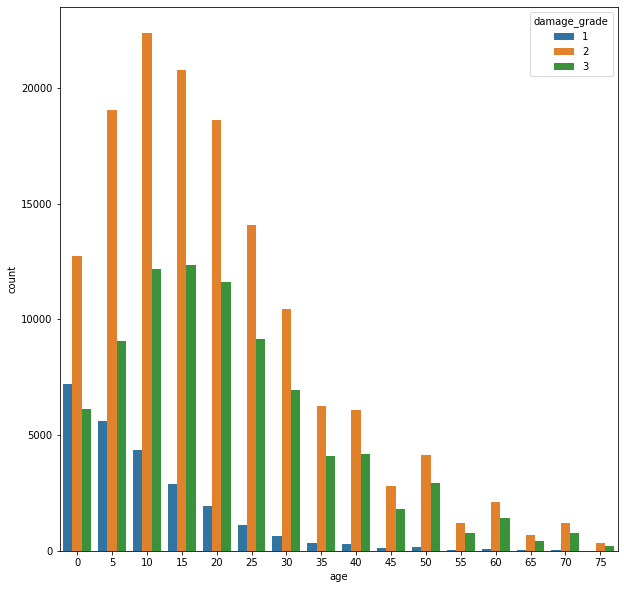

In [106]:
plt.figure(figsize=(10,10))
sns.countplot(x='age', data=df3, hue='damage_grade')
plt.show()

In [107]:
df3.age.value_counts()

10    38896
15    36010
5     33697
20    32182
0     26041
25    24366
30    18028
35    10710
40    10559
50     7257
45     4711
60     3612
55     2033
70     1975
65     1123
75      512
Name: age, dtype: int64

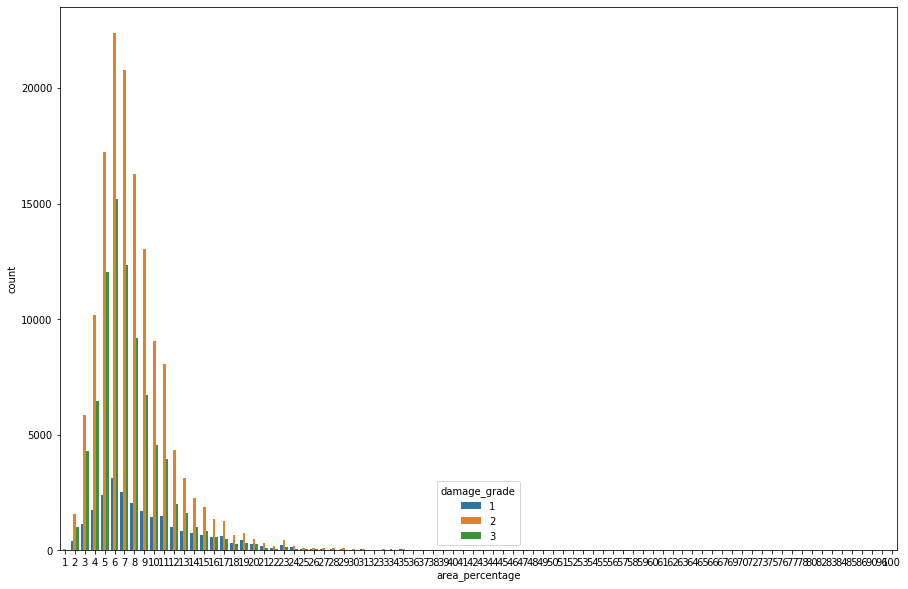

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(x='area_percentage', data=df3, hue='damage_grade')
plt.show()

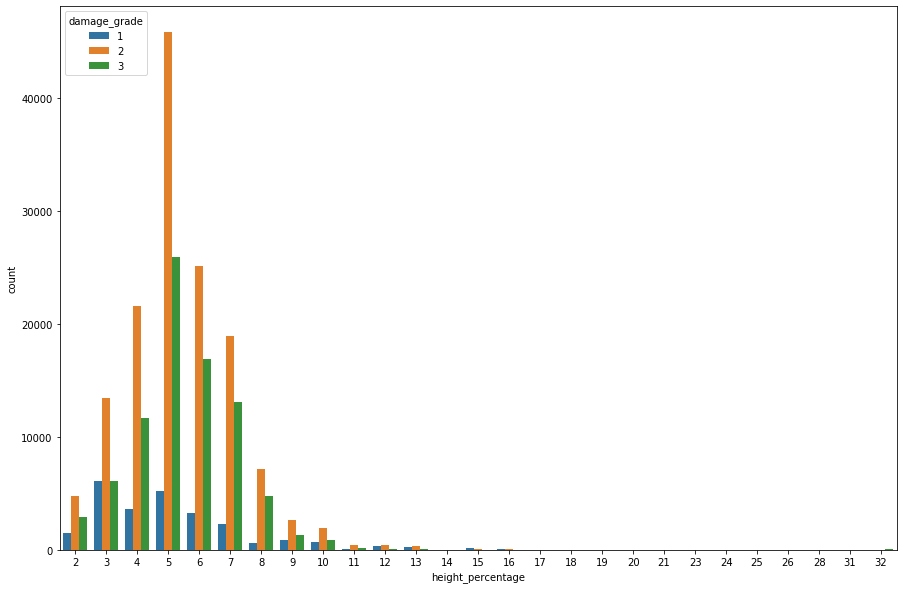

In [114]:
plt.figure(figsize=(15,10))
sns.countplot(x='height_percentage', data=df3, hue='damage_grade')
plt.show()

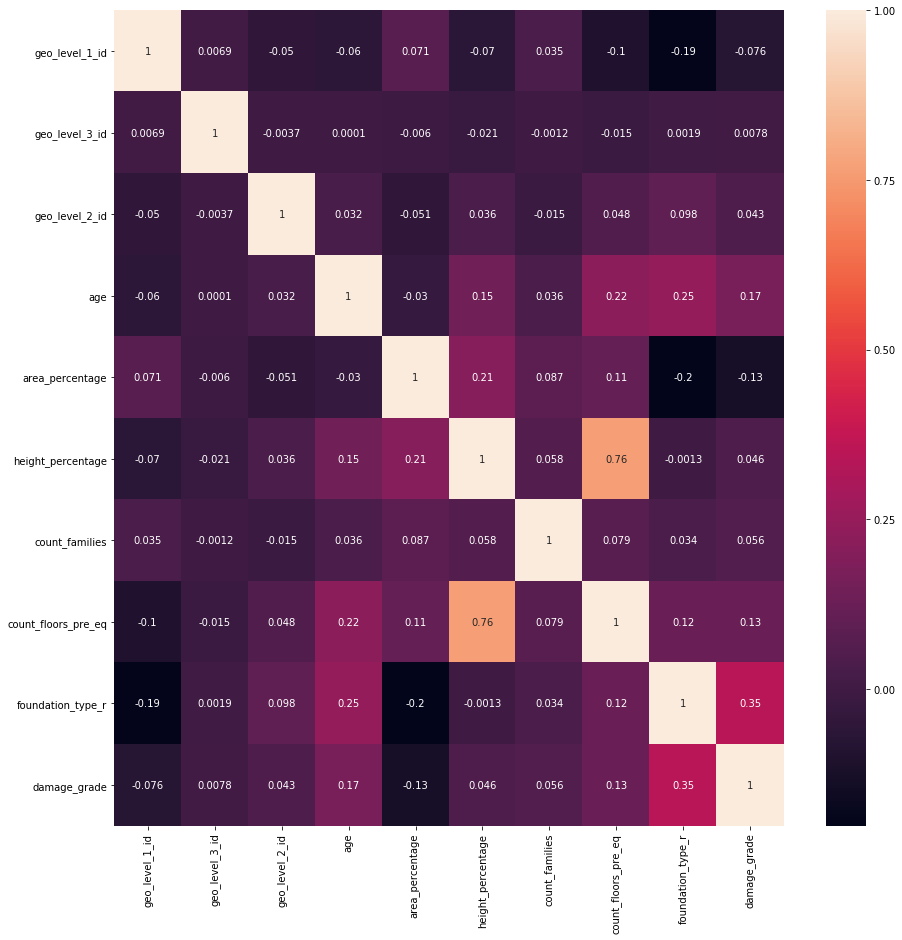

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(dfimp.corr(), annot=True)
plt.show()

In [269]:
dfshort = dfimp[['damage_grade', 'foundation_type_r', 'count_floors_pre_eq','area_percentage','age']]

In [275]:
x = dfshort.drop('damage_grade', axis=1)
y = dfshort['damage_grade']

In [283]:
xtrain,xtest,ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=123)

In [272]:
from tpot import TPOTClassifier

In [284]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, offspring_size=100,scoring='accuracy', cv=5, early_stop=30, random_state=12)

In [ ]:
tpot.fit(xtrain,ytrain)

Generation 1 - Current best internal CV score: 0.7210297661078011
Generation 2 - Current best internal CV score: 0.7210297661078011
Generation 3 - Current best internal CV score: 0.7237142780879929
Generation 4 - Current best internal CV score: 0.7237142780879929
Generation 5 - Current best internal CV score: 0.7237142780879929


In [128]:
submission_latest.to_csv('Earthquake_latest.csv', index=False)

In [129]:
submission_latest

,Building_id,Damage_Grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
5,871976,2
6,691228,2
7,896100,3
8,343471,2
9,766647,2


In [187]:
diff = pd.Series([submission['Damage_Grade'] == submission_latest['Damage_Grade']])